# Homework - How does Tolkien sound? Which is the most angry book?

In [92]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot

In [68]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [89]:
import glob

filenames = glob.glob("tolkien/*.txt")
filenames[:4]

['tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt',
 'tolkien/Lord of the Rings - 01 - The Fellowship of the Ring - J. R. R. Tolkien - 1955.txt',
 'tolkien/Lord of the Rings - 02 - The Two Towers - J. R. R. Tolkien - 1965.txt',
 'tolkien/Lord of the Rings - 03 - The Return of the King - J. R. R. Tolkien - 1965.txt']

In [16]:
the_rings = [open(filename).read() for filename in filenames]
len(the_rings)

4

In [17]:
the_rings_df = pd.DataFrame({
    'text': the_rings,
    'filename': filenames
})
the_rings_df.head(4)

,filename,text
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False,
                      norm='l1') # ELL ONE

matrix = vec.fit_transform(the_rings_df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.000049,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000074,0.000124,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000093,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000024,0.0,0.000049,0.000098,0.000024,0.000024,0.0,0.0,0.0,0.000024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil']].sum(axis=1)

0    0.002952
1    0.003409
2    0.004386
3    0.003884
dtype: float64

In [72]:
the_rings_df['negative'] = wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil']].sum(axis=1)
the_rings_df['negative']

0    0.002952
1    0.003409
2    0.004386
3    0.003884
Name: negative, dtype: float64

In [74]:
the_rings_df

,filename,text,name,content,negative
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,,0.002952
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,,0.003409
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,,0.004386
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,,0.003884


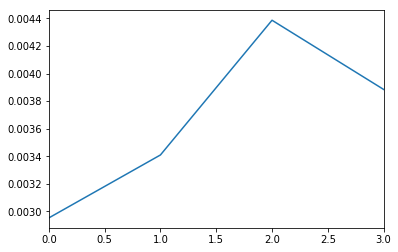

In [75]:
the_rings_df['negative'].plot(x='name', y='negative', label='Negative Sound')

In [90]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head(2)

3      abandoned
4    abandonment
Name: word, dtype: object

In [79]:
postive_words = emolex_df[emolex_df.positive == 1]['word']
postive_words.head()

7               abba
20           ability
36    abovementioned
48          absolute
49        absolution
Name: word, dtype: object

In [102]:
the_rings_df['positive'] = wordcount_df[list(postive_words)].sum(axis=1)
the_rings_df.head(4)

,filename,text,name,content,negative,postive,positive
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,,0.002952,0.002952,0.182019
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,,0.003409,0.003409,0.185993
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,,0.004386,0.004386,0.182992
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,,0.003884,0.003884,0.197034


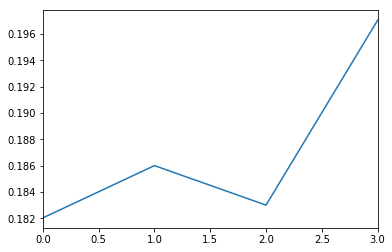

In [87]:
the_rings_df['positive'].plot()

In [ ]:
#Outcome: the opposite. 

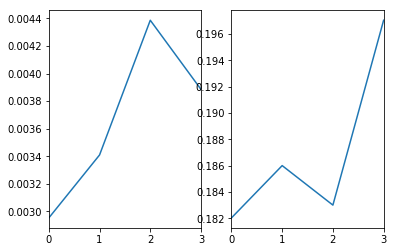

In [101]:
fig = plt.figure()
ax = fig.add_subplot(121) # hoch/runter
ax2 = fig.add_subplot(122) # seitlich
the_rings_df['negative'].plot(x='name', y='negative', label='Negative Sound', ax=ax)
the_rings_df['positive'].plot(ax=ax2)

In [103]:
#The Two Towers are on the dark side, The Return on the bright one. 